In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [6]:
# Step 2: Read the dataset
df = pd.read_csv("Churn_Modelling.csv")
print(df.head())
print(df.shape)


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

In [7]:
# Step 3: Separate feature and target columns
# Drop unnecessary columns that do not affect churn prediction
X = df.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
y = df['Exited']

# Convert categorical columns into numeric using one-hot encoding
X = pd.get_dummies(X, drop_first=True)
print("Feature columns after encoding:\n", X.columns)

Feature columns after encoding:
 Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')


In [8]:
# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (8000, 11)
Testing set shape: (2000, 11)


In [9]:
# Step 5: Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data normalization complete!")


Data normalization complete!


In [10]:
# Step 6: Initialize and build the model
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print("Neural network model built successfully!")

Neural network model built successfully!


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Step 7: Train the model
history = model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=20, batch_size=32, verbose=1)


Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7885 - loss: 0.4868 - val_accuracy: 0.8140 - val_loss: 0.4224
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8133 - loss: 0.4270 - val_accuracy: 0.8265 - val_loss: 0.4017
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8299 - loss: 0.4053 - val_accuracy: 0.8380 - val_loss: 0.3823
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8426 - loss: 0.3837 - val_accuracy: 0.8415 - val_loss: 0.3655
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8472 - loss: 0.3682 - val_accuracy: 0.8440 - val_loss: 0.3570
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8503 - loss: 0.3584 - val_accuracy: 0.8470 - val_loss: 0.3539
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8553 - loss: 0.3532 - val_accuracy: 0.8495 - val_loss: 0.3512
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8539 - loss: 0.3494 - val_accuracy: 0.

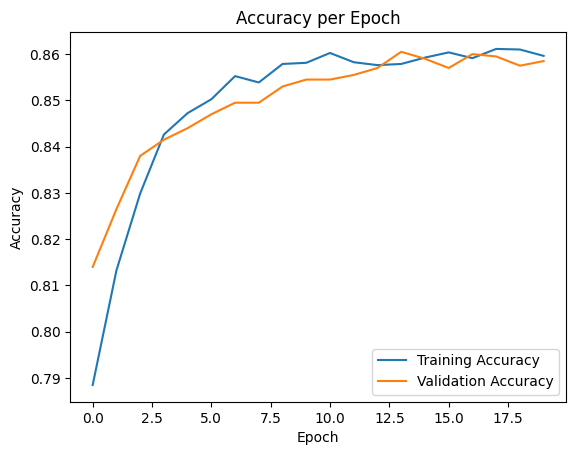

In [12]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
# Step 8: Predict and evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype(int)

# Accuracy and Confusion Matrix
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("\nModel Accuracy:", round(acc * 100, 2), "%")
print(" Confusion Matrix:\n", cm)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  

Model Accuracy: 85.85 %
 Confusion Matrix:
 [[1543   64]
 [ 219  174]]
